In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

import matplotlib
matplotlib.rc('font', family='AppleGothic')
matplotlib.rc('axes', unicode_minus=False)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# 그래프 틀 변경
plt.rcParams['axes.unicode_minus'] = False
sns.set(font_scale = 1)  
plt.style.use(['fivethirtyeight'])
pd.set_option('display.max_columns', None)

In [2]:
# 한글폰트 사용
import os

if os.name == 'posix':

    plt.rc("font", family="AppleGothic")
else :

    plt.rc("font", family="Malgun Gothic")

In [3]:
df = pd.read_csv('covid_data (2).csv', index_col = 0)
df.head(3)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,년,월,일,주
0,193389,540828,2021-12-15,기타,-,감염경로 조사중,NaN,2021,12,15,50
1,193388,543915,2021-12-15,기타,-,감염경로 조사중,NaN,2021,12,15,50
2,193387,543911,2021-12-15,기타,-,감염경로 조사중,NaN,2021,12,15,50


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193389 entries, 0 to 193388
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   연번      193389 non-null  int64 
 1   환자      193389 non-null  int64 
 2   확진일     193389 non-null  object
 3   거주지     193389 non-null  object
 4   여행력     193389 non-null  object
 5   접촉력     193389 non-null  object
 6   퇴원현황    143961 non-null  object
 7   년       193389 non-null  int64 
 8   월       193389 non-null  int64 
 9   일       193389 non-null  int64 
 10  주       193389 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 17.7+ MB


In [5]:
df["확진일"] = pd.to_datetime(df["확진일"])
#df["년"] = df["확진일"].dt.year
#df["월"] = df["확진일"].dt.month
#df["일"] = df["확진일"].dt.day
#df["주"] = df["확진일"].dt.week

#df[["확진일", "년", "월", "일", "주"]] "

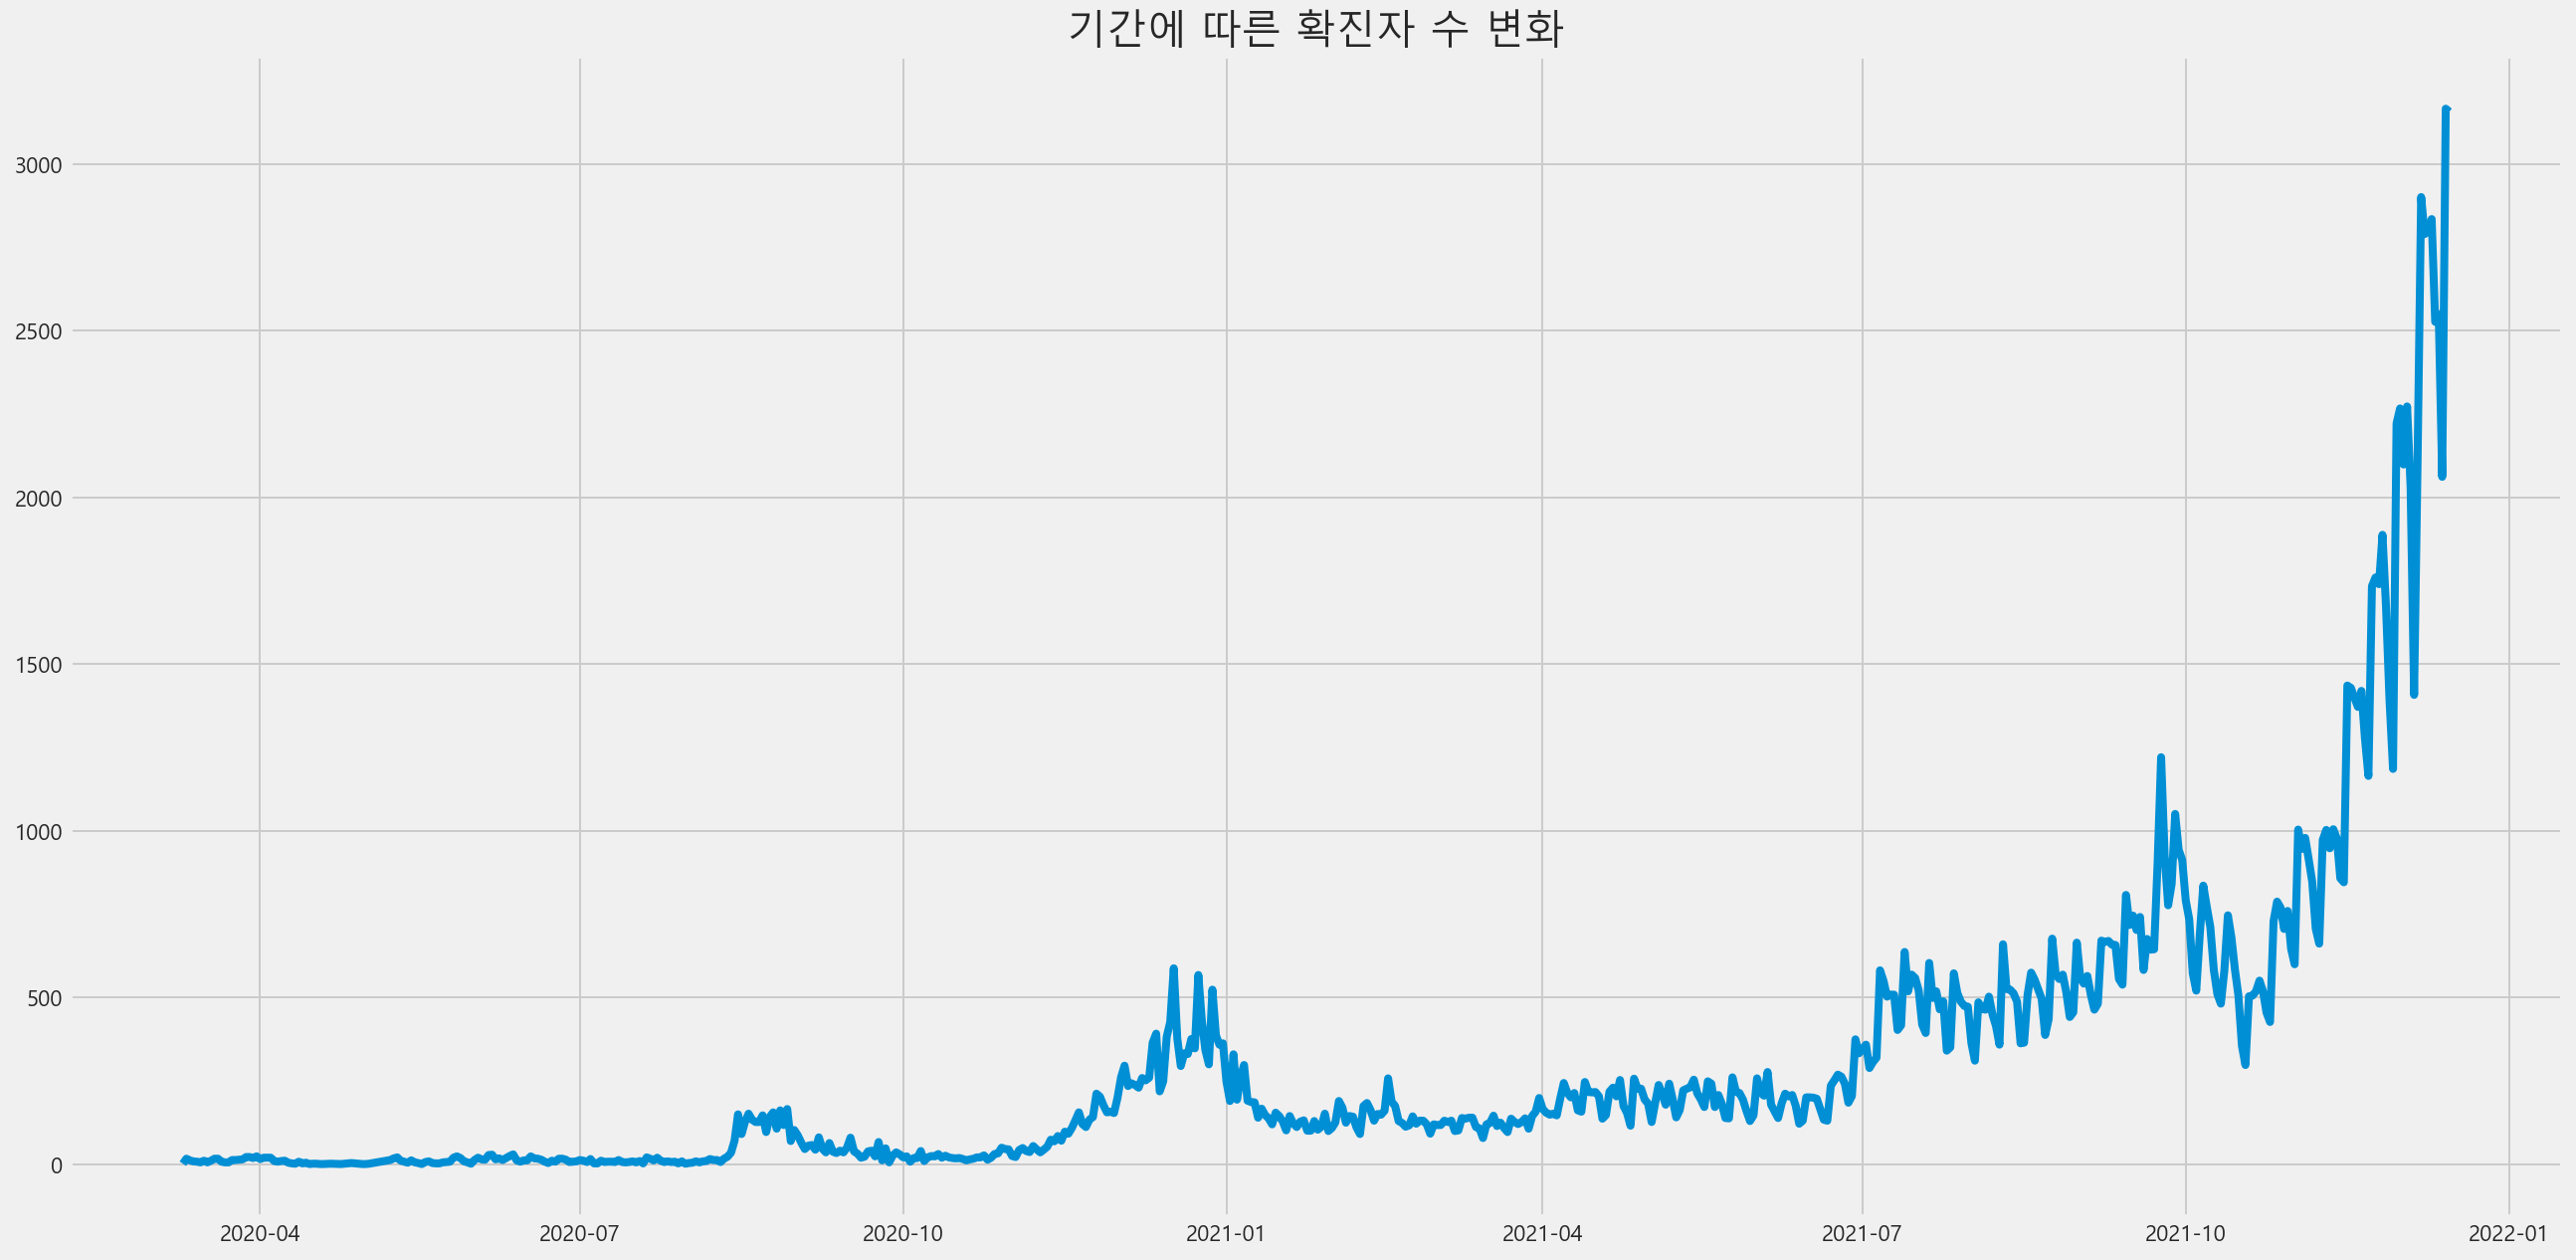

In [6]:
#20년 말에 확진자 급증은 추석연휴 간 이동, 수도권을 중심으로 집단감역 
#2021-7월 코로나 확진자수 증가 원인은 실내체육시설, 어린이집, 직장 등 각종 생활시설에서 신규 집단감염
# 2021-10월 중순부터 확진수가 급증한 양상을 볼 수 있습니다. 이는 거리두기 단계를 완하하고 단계적 일상회복이 시행된 시기랑 동일합니다.


fig , ax = plt.subplots(figsize = (20,10))

ax.plot(df["확진일"].value_counts().sort_index())
ax.set_title("기간에 따른 확진자 수 변화")
plt.show()

### 확진자가 급증했던 기간 접촉력 확인


In [7]:
df_7_9 = df[(df["확진일"] >= '2020-7-1') & (df["확진일"] <= '2020-9-30')]["접촉력"].value_counts().sort_values(ascending =False).head(20)

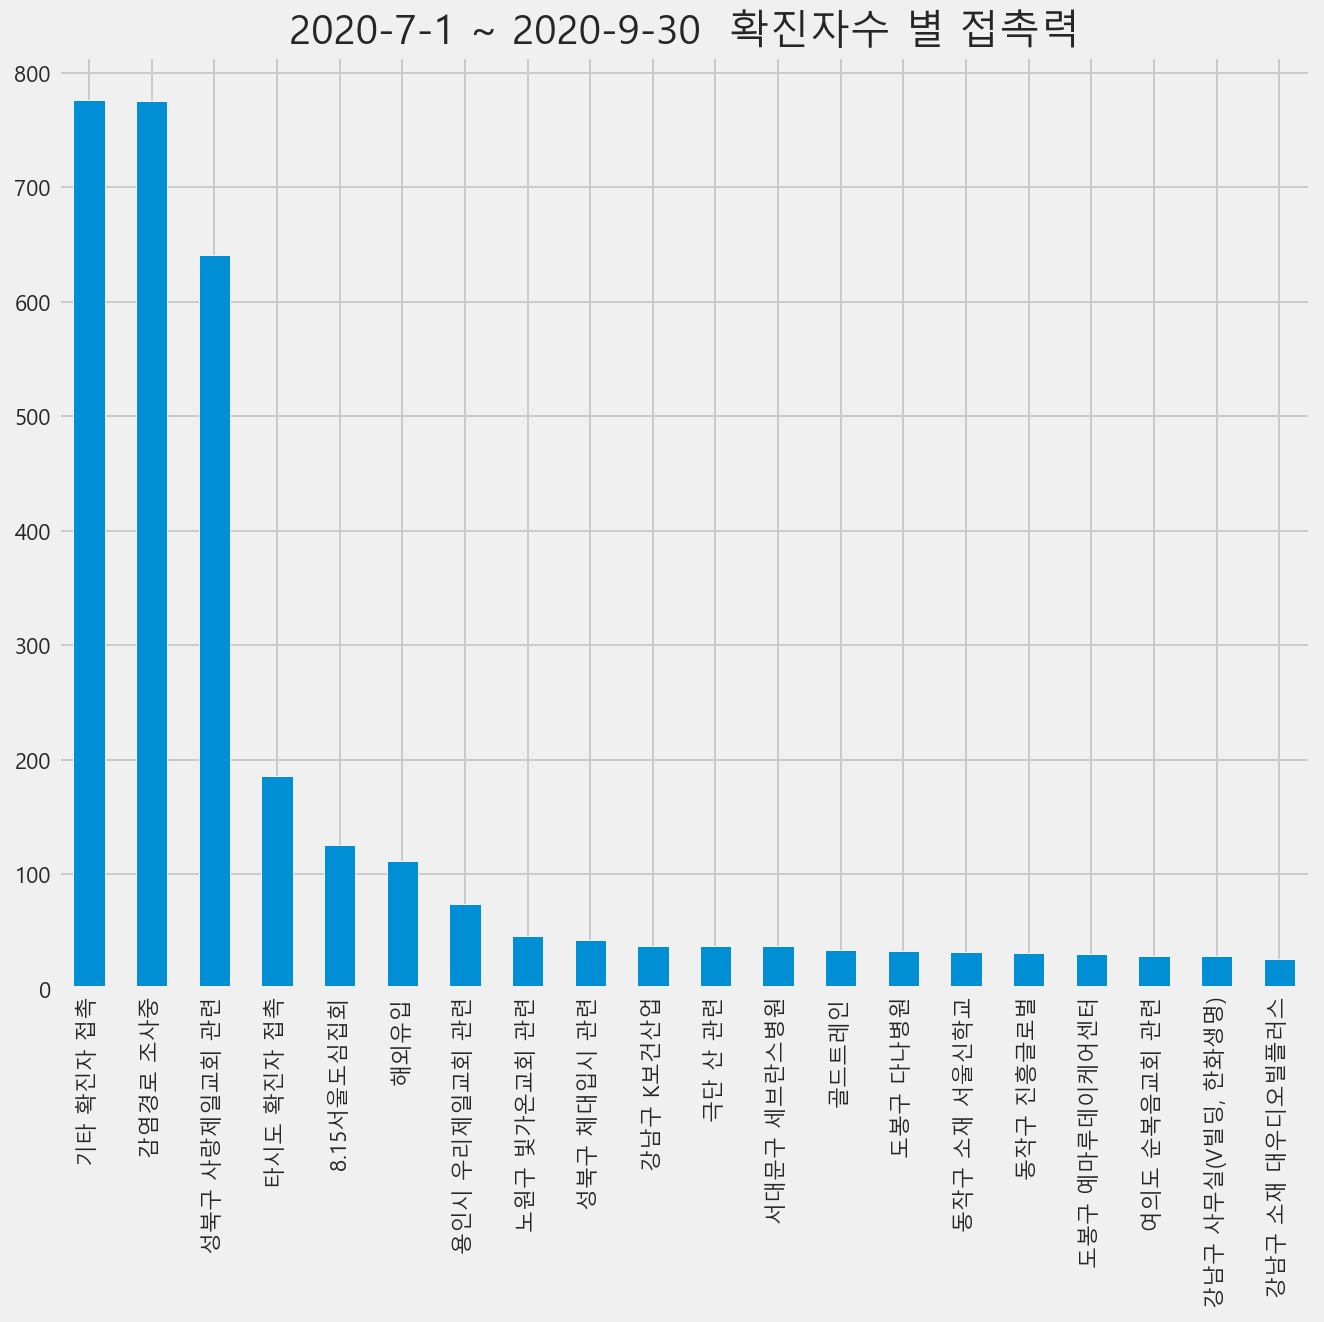

In [8]:
# 사랑제일교회 여파 
fig , ax = plt.subplots(figsize = (10,8))

df_7_9.plot.bar()
ax.set_title("2020-7-1 ~ 2020-9-30  확진자수 별 접촉력")
plt.show()

In [9]:
df_11_1 = df[(df["확진일"] >= '2020-11-1') & (df["확진일"] <= '2021-1-30')]["접촉력"].value_counts().sort_values(ascending =False).head(20)

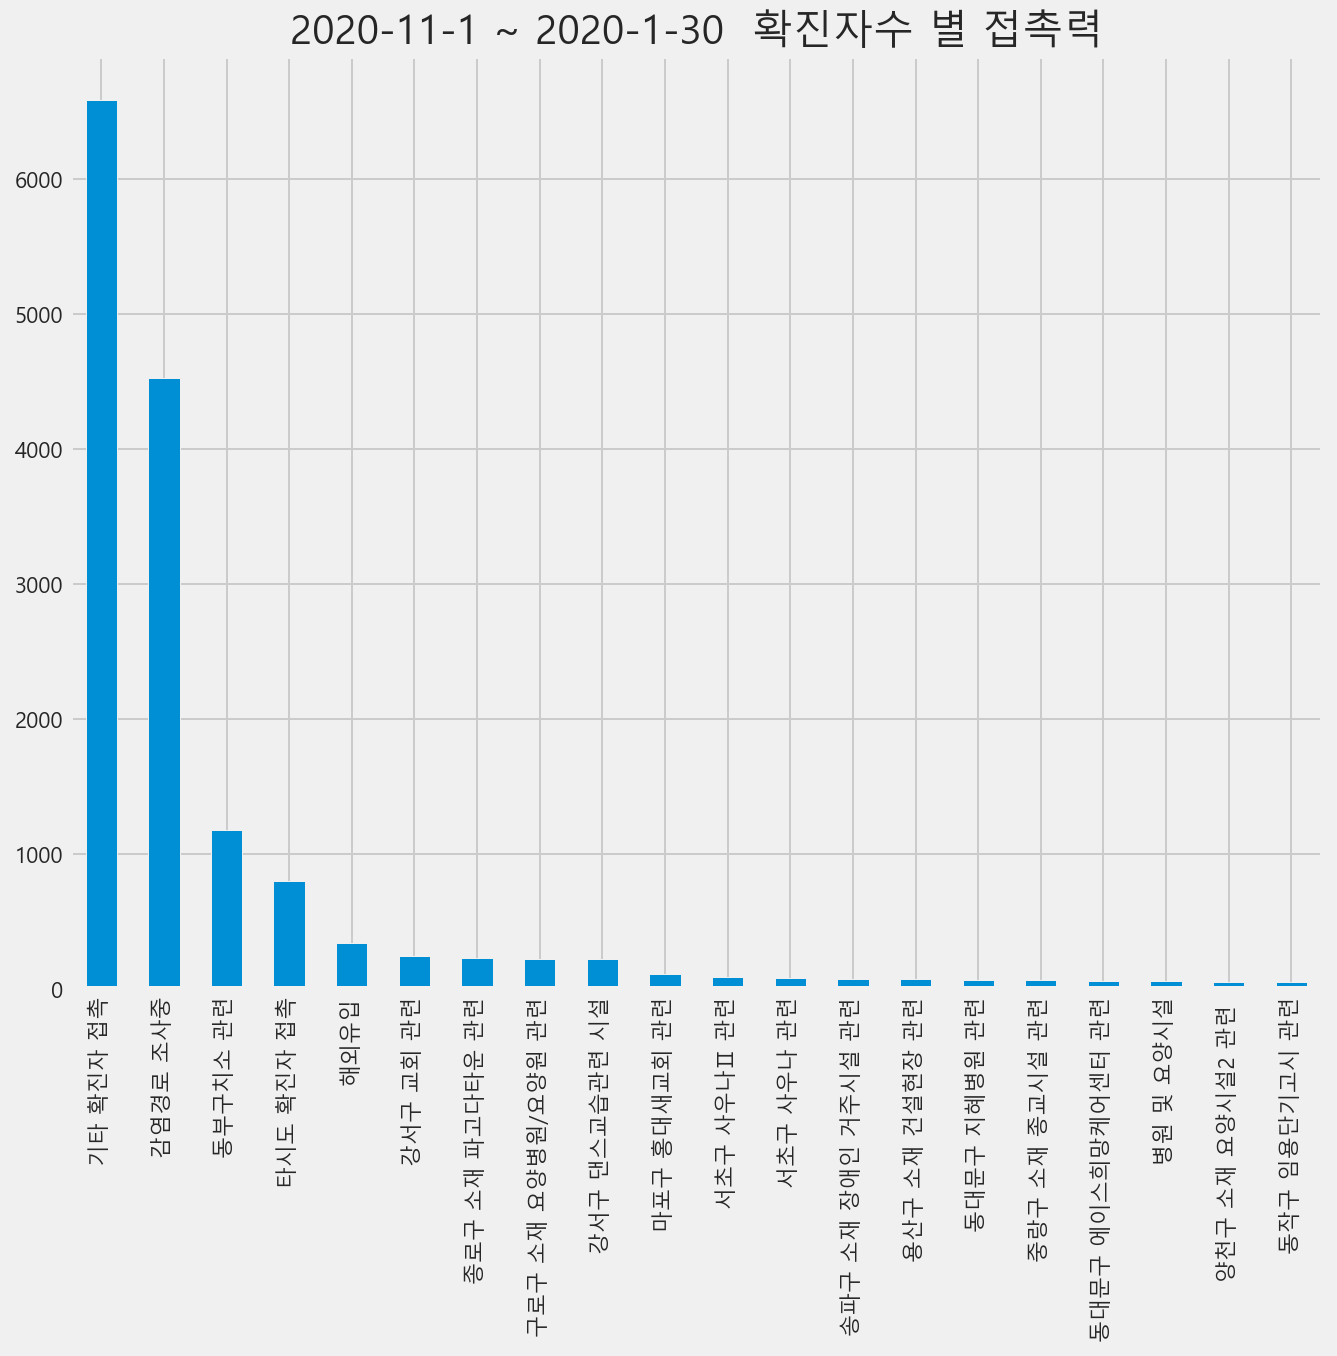

In [10]:
# 동부구치소 여파 
fig , ax = plt.subplots(figsize = (10,8))

df_11_1.plot.bar()
ax.set_title("2020-11-1 ~ 2020-1-30  확진자수 별 접촉력")
plt.show()

In [11]:
df_11_12 = df[(df["확진일"] >= '2021-11-1') & (df["확진일"] <= '2021-12-7')]["접촉력"].value_counts().sort_values(ascending =False).head(20)

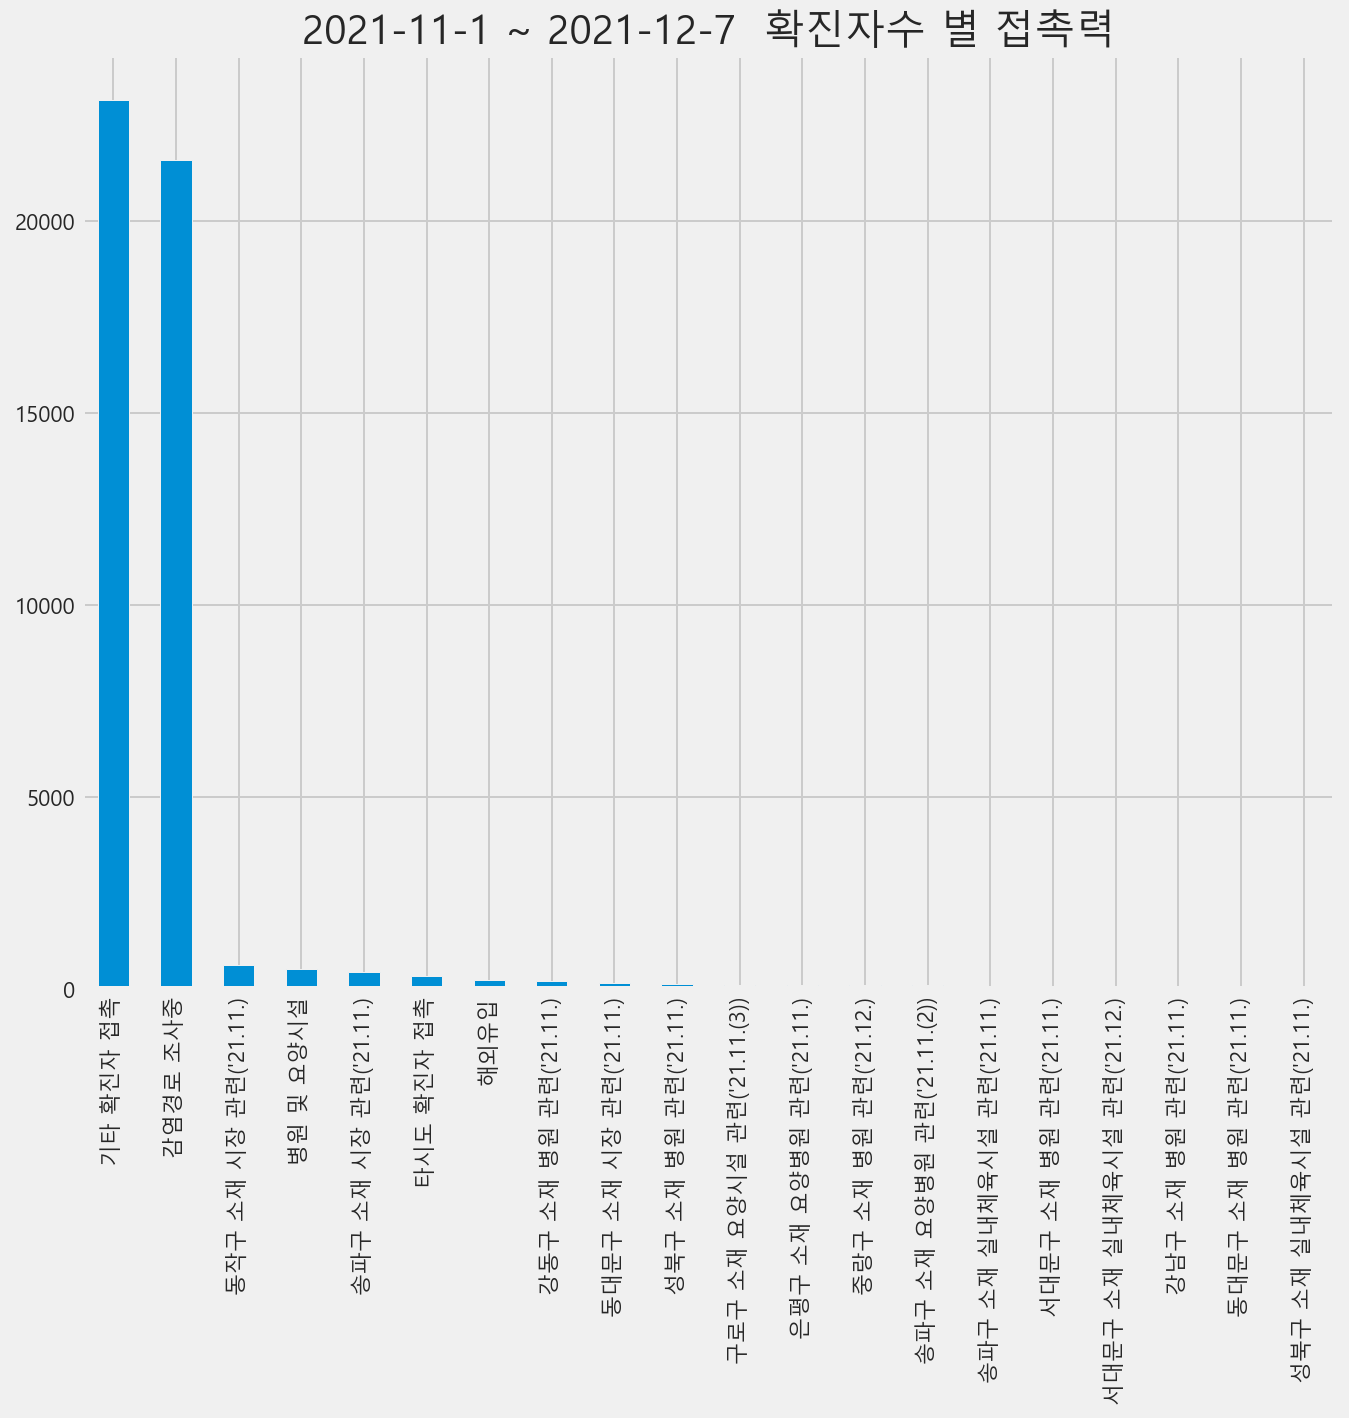

In [12]:
# 21년 말 부터 집단감염이 다분했던 20년도와 상이하게 산발적으로 지역감염이 많이 일어나고 있다는 것을 볼 수 있다.
fig , ax = plt.subplots(figsize = (10,8))

df_11_12.plot.bar()
ax.set_title("2021-11-1 ~ 2021-12-7  확진자수 별 접촉력")
plt.show()

### 접촉력 별 확진자 분석

<AxesSubplot:>

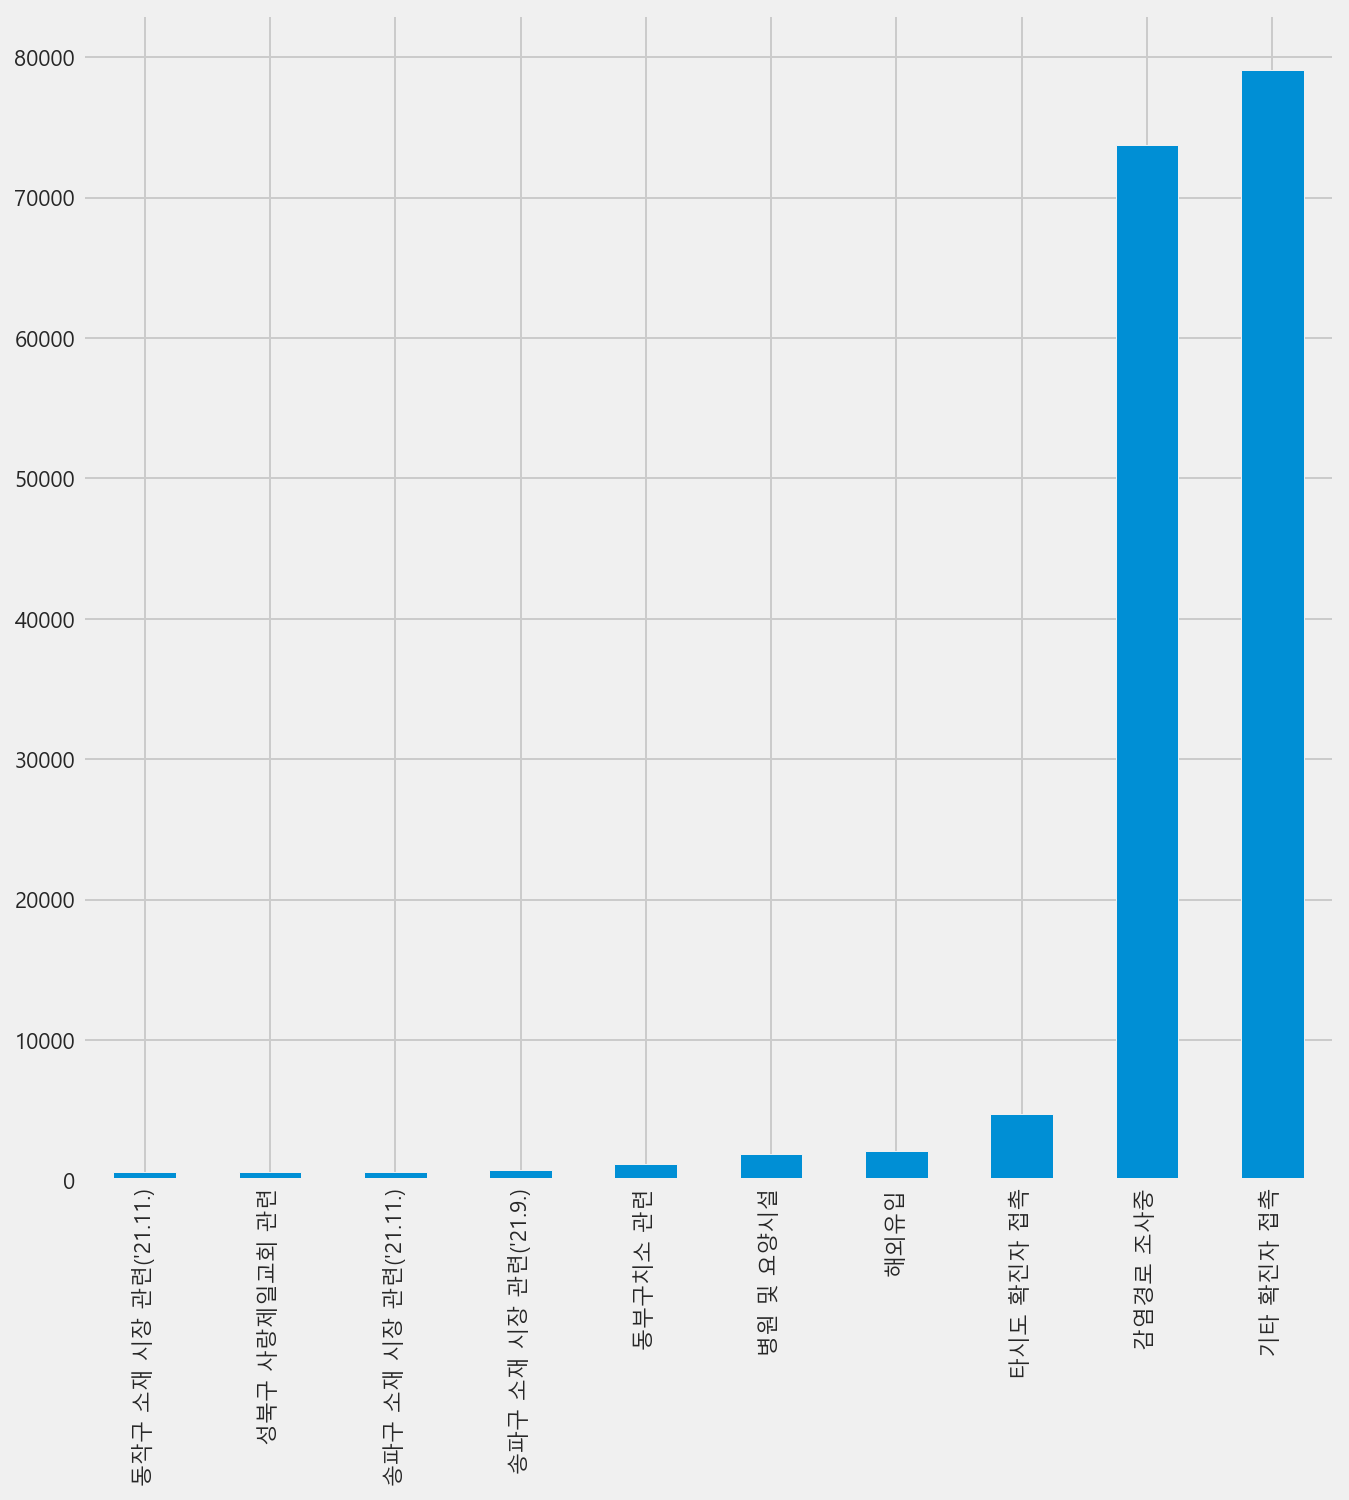

In [13]:
# 전체 기준 
top = df["접촉력"].value_counts().sort_values().tail(10)
top.plot.bar(figsize=(10,10))

In [14]:
top_group = df[df["접촉력"].isin(top.tail(15).index)]
top_group

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,년,월,일,주
0,193389,540828,2021-12-15,기타,-,감염경로 조사중,NaN,2021,12,15,50
1,193388,543915,2021-12-15,기타,-,감염경로 조사중,NaN,2021,12,15,50
2,193387,543911,2021-12-15,기타,-,감염경로 조사중,NaN,2021,12,15,50
3,193386,543909,2021-12-15,기타,-,감염경로 조사중,NaN,2021,12,15,50
4,193385,543904,2021-12-15,기타,-,감염경로 조사중,NaN,2021,12,15,50
...,...,...,...,...,...,...,...,...,...,...,...
193367,222,7965,2020-03-12,강북구,필리핀,해외유입,퇴원,2020,3,12,11
193373,216,8063,2020-03-11,성북구,유럽,해외유입,퇴원,2020,3,11,11
193374,215,7856,2020-03-11,송파구,-,감염경로 조사중,퇴원,2020,3,11,11
193382,207,7757,2020-03-11,은평구,-,감염경로 조사중,퇴원,2020,3,11,11


In [15]:
# 2020년 기준 
top_group_2020 = top_group[top_group["년"]==2020].groupby(["접촉력", "월"])["연번"].count().unstack().fillna(0).astype(int)
top_group_2020.style.background_gradient(cmap="Blues")


월,3,4,5,6,7,8,9,10,11,12
접촉력,,,,,,,,,,
감염경로 조사중,37,16,5,66,49,440,286,120,474,2729
기타 확진자 접촉,10,9,0,14,33,439,304,116,631,4023
동부구치소 관련,0,0,0,0,0,0,0,0,3,930
병원 및 요양시설,0,0,0,0,0,1,0,0,0,2
성북구 사랑제일교회 관련,0,0,0,0,0,628,13,0,0,0
타시도 확진자 접촉,0,1,2,4,13,102,71,33,124,466
해외유입,126,111,25,23,39,50,23,44,83,110


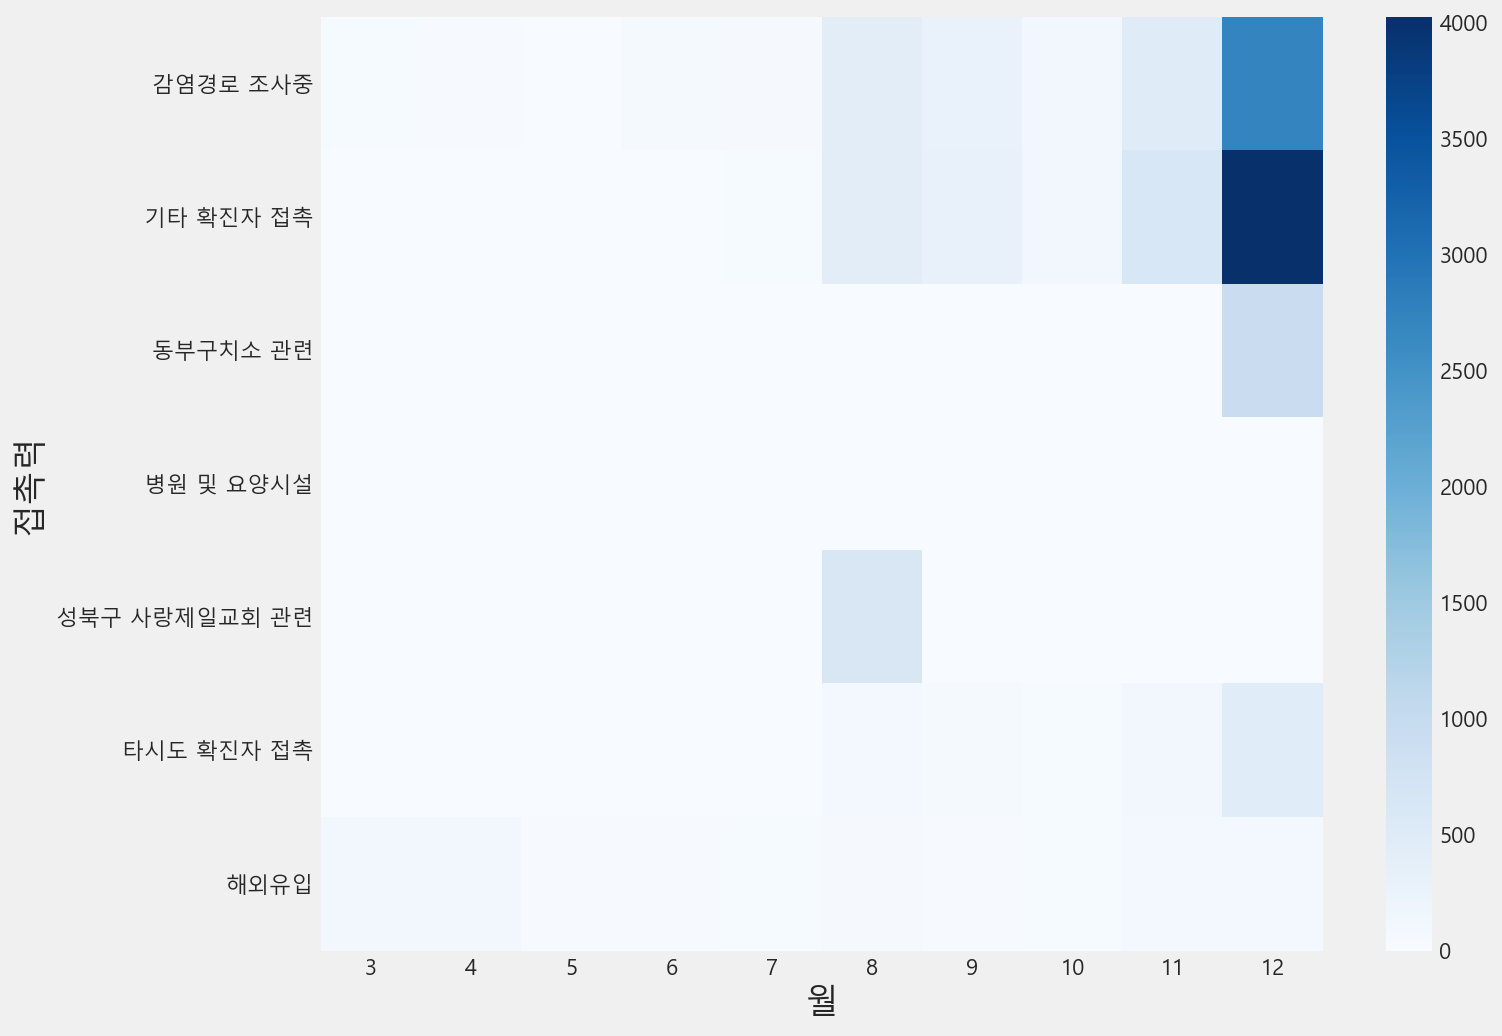

In [16]:
fig = plt.figure(figsize = (10,8))

sns.heatmap(top_group_2020,cmap =  "Blues")
plt.show()

In [17]:
# 2021년 기준 
top_group_2021 = top_group[top_group["년"]==2021].groupby(["접촉력", "월"])["연번"].count().unstack().fillna(0).astype(int)
top_group_2021.style.background_gradient(cmap="Reds")

월,1,2,3,4,5,6,7,8,9,10,11,12
접촉력,,,,,,,,,,,,
감염경로 조사중,1348,964,1012,1517,1675,2270,5231,5601,8871,8187,14408,18461
기타 확진자 접촉,1961,1497,1324,2047,2244,2264,6172,6734,8865,7776,16568,16078
동부구치소 관련,242,0,0,0,0,0,0,0,0,0,0,0
동작구 소재 시장 관련('21.11.),0,0,0,0,0,0,0,0,0,0,522,97
병원 및 요양시설,57,82,63,69,113,79,181,155,201,249,412,198
송파구 소재 시장 관련('21.11.),0,0,0,0,0,0,0,0,0,0,302,345
송파구 소재 시장 관련('21.9.),0,0,0,0,0,0,0,1,688,66,0,0
타시도 확진자 접촉,212,146,243,355,354,360,616,530,595,112,253,139
해외유입,149,132,64,80,75,106,163,189,134,116,167,126


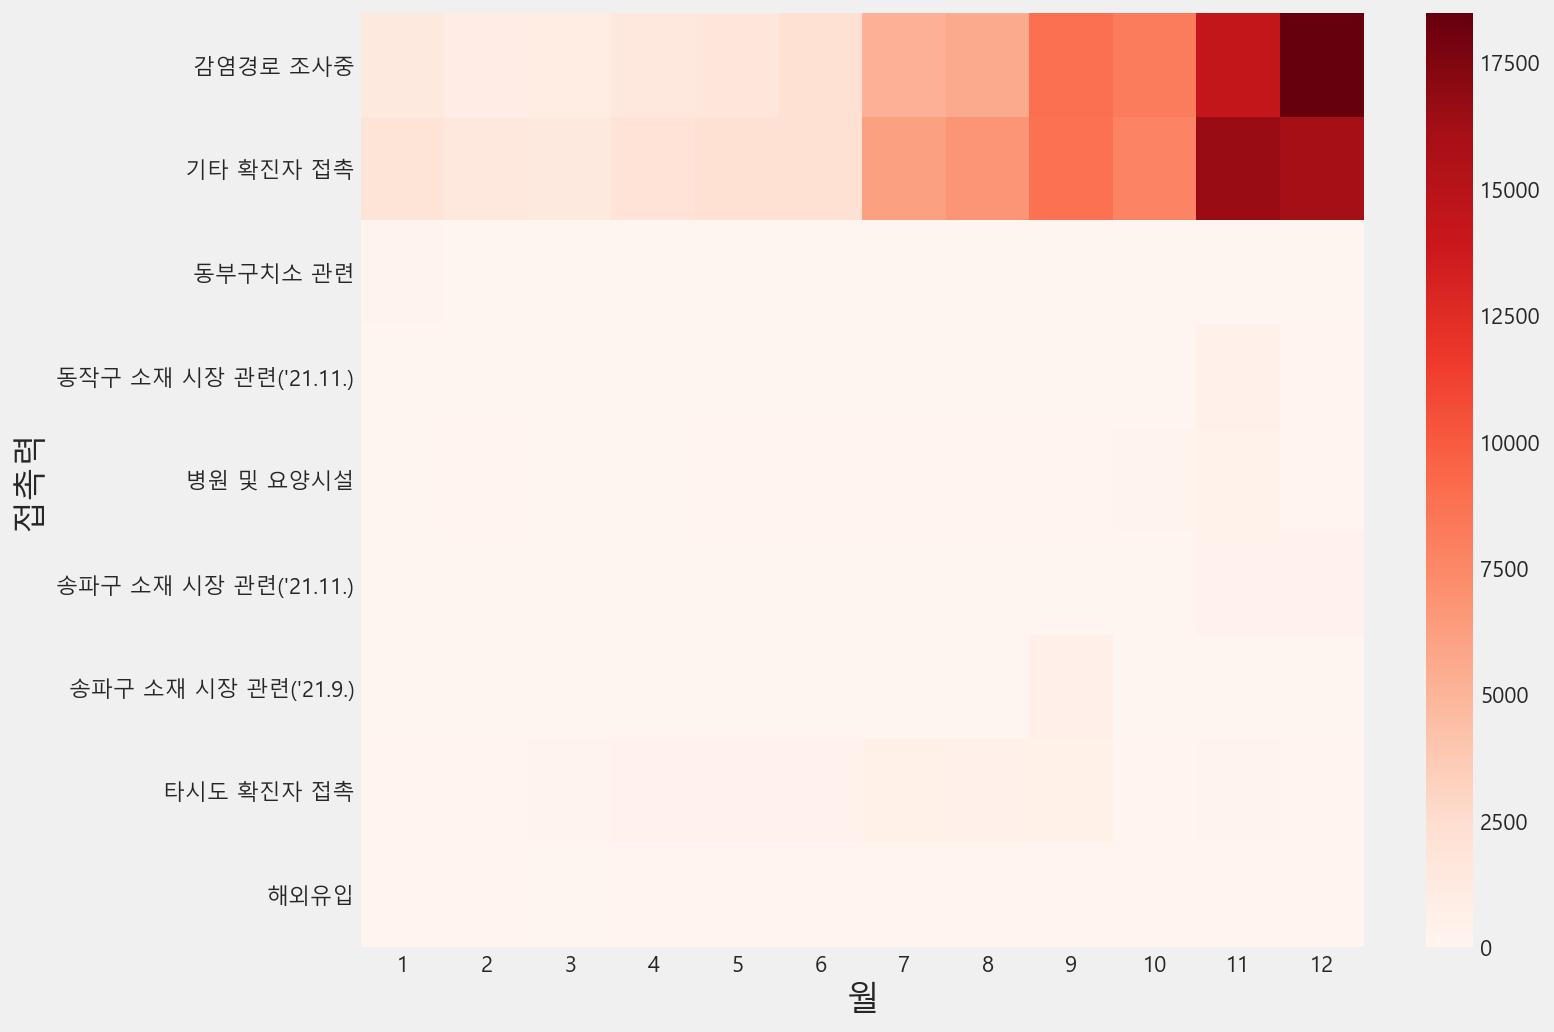

In [18]:
fig = plt.figure(figsize = (10,8))

sns.heatmap(top_group_2021,cmap =  "Reds")
plt.show()

### 퇴원자 사망자 비교

In [19]:
df["퇴원"] = df["퇴원현황"].str.contains("퇴원", na=False)
df["사망"] = df["퇴원현황"].str.contains("사망", na=False)

In [20]:
np.round(df["퇴원"].value_counts(normalize=True),2)

True     0.74
False    0.26
Name: 퇴원, dtype: float64

In [21]:
np.round(df["사망"].value_counts(normalize=True),2)

False    0.99
True     0.01
Name: 사망, dtype: float64

In [22]:
df_dead = df[df["퇴원현황"] == "사망"]
df_alive = df[df["퇴원현황"] == "퇴원"]

In [23]:
df_dead.head(3)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,년,월,일,주,퇴원,사망
3227,190262,528656,2021-12-14,영등포구,-,감염경로 조사중,사망,2021,12,14,50,False,True
3505,189984,528654,2021-12-14,기타,-,감염경로 조사중,사망,2021,12,14,50,False,True
4109,189380,536458,2021-12-14,타시도,-,기타 확진자 접촉,사망,2021,12,14,50,False,True


In [24]:
# 2020월별 사망자수 
df_d_2020 = df_dead[df_dead["년"]==2020].groupby(["퇴원현황", "월"])["연번"].count().unstack().fillna(0).astype(int)
df_d_2020.style.background_gradient(cmap="Reds", vmin =0 ,vmax = 400)

월,3,6,7,8,9,10,11,12
퇴원현황,,,,,,,,
사망,2,7,4,39,24,7,44,179


In [25]:
# 2020일별 사망자수 (계절성)
df_d_2020 = df_dead[df_dead["년"]==2020].groupby(["퇴원현황", "월","일"])["연번"].count().unstack().fillna(0).astype(int)
df_d_2020.style.background_gradient(cmap="Reds", vmin =0 ,vmax = 20)

In [26]:
# 2020월별 퇴원자수
df_alive_2021 = df_alive[df_alive["년"]==2020].groupby(["퇴원현황", "월"])["연번"].count().unstack().fillna(0).astype(int)
df_alive_2021.style.background_gradient(cmap="Greens",vmin =4000 ,vmax = 20000)

월,3,4,5,6,7,8,9,10,11,12
퇴원현황,,,,,,,,,,
퇴원,276,156,229,452,277,2376,1282,726,2860,10253


In [27]:
# 2021월별 사망자수 
df_d_2021 = df_dead[df_dead["년"]==2021].groupby(["퇴원현황", "월"])["연번"].count().unstack().fillna(0).astype(int)
df_d_2021.style.background_gradient(cmap="Reds", vmin =0 ,vmax = 400)

월,1,2,3,4,5,6,7,8,9,10,11,12
퇴원현황,,,,,,,,,,,,
사망,65,49,25,29,38,23,34,48,100,159,406,138


In [28]:
# 2021일별 사망자수 (계절성, 중환자수가 늘어나서 인가? )
df_d_2021 = df_dead[df_dead["년"]==2021].groupby(["퇴원현황", "월","일"])["연번"].count().unstack().fillna(0).astype(int)
df_d_2021.style.background_gradient(cmap="Reds", vmin =0 ,vmax = 20)

In [29]:
#2021월별 퇴원자수 
df_alive_2021 = df_alive[df_alive["년"]==2021].groupby(["퇴원현황", "월"])["연번"].count().unstack().fillna(0).astype(int)
df_alive_2021.style.background_gradient(cmap="Greens",vmin =4000 ,vmax = 20000)

월,1,2,3,4,5,6,7,8,9,10,11,12
퇴원현황,,,,,,,,,,,,
퇴원,4813,4011,3872,5774,5992,6235,14448,14709,17472,15567,26379,4382


### 여행력 별 확진자 분석

In [30]:
df["해외"] = df["여행력"] 
df["해외"] = df["해외"].replace('-', np.nan) # - 를 Nan으로 교체

# df_oversea: 해외 칼럼 데이터를 가진 경우만 필터링
df_oversea = df[df["해외"].notnull()].copy()
df_oversea.drop(df_oversea[df_oversea["해외"]=='28238'].index, inplace=True) # 환자 번호가 잘못 들어간 row 데이터 삭제
df_oversea.drop(df_oversea[df_oversea["해외"]=='21263'].index, inplace=True) # 환자 번호가 잘못 들어간 row 데이터 삭제

In [31]:
europe = "체코,헝가리,오스트리아,이탈리아,프랑스,모로코,독일,스페인,영국,폴란드,터키,아일랜드"
europe = europe.replace(",", "|")
south_america = "브라질,아르헨티아,칠레,볼리비아,멕시코,페루"
south_america = south_america.replace(",", "|")

df_oversea.loc[df_oversea["해외"].str.contains(europe), "해외"] = '유럽'
df_oversea.loc[df_oversea["해외"].str.contains(south_america), "해외"] = '남미'
df_oversea.loc[df_oversea["해외"].str.contains('중국|우한'), "해외"] = '중국'
df_oversea.loc[df_oversea["해외"].str.contains('아랍에미리트'), "해외"] = 'UAE'
df_oversea.loc[df_oversea["해외"].str.contains('필리핀'), "해외"] = '필리핀'
df_oversea.loc[df_oversea["해외"].str.contains('미국'), "해외"] = '미국'

df_oversea["해외"]

92         유럽
192        유럽
655        미국
681        미국
885        인도
         ... 
193353     유럽
193359     유럽
193360     유럽
193367    필리핀
193373     유럽
Name: 해외, Length: 2088, dtype: object

In [32]:
set(df["여행력"])

{' ',
 '  ',
 '-',
 '21.4.7',
 'UAE',
 '가나',
 '강릉',
 '과테말라',
 '괌',
 '그리스',
 '나이지리아',
 '남미',
 '남아공',
 '남아프리카공화국',
 '네덜란드',
 '네팔',
 '덴마크',
 '도미니카공화국',
 '독일',
 '독일 뒤셀도르프',
 '동남아시아',
 '두바이',
 '라오스',
 '러브코랄무드',
 '러시아',
 '레바논',
 '루마니아',
 '르완다',
 '리투아니아',
 '마케도니아',
 '말레이시아',
 '멕시코',
 '멕시코(미국경유)',
 '모로코',
 '모리셔스',
 '모리타니아',
 '몰디브',
 '몰타',
 '몽골',
 '미국',
 '미국 ',
 '미국 20년 12월 29일 입국',
 '미국 뉴욕',
 '미국 아틀란타',
 '미국 애틀란타',
 '미국 팔로알퍼',
 '미국(12.16)',
 '미국, 중국',
 '미국LA',
 '미얀마',
 '바레인',
 '방글라데시',
 '방글라데시,아랍에미리트',
 '방콕 푸켓',
 '베네수엘라',
 '베트남',
 '베트남 사이공',
 '벨기에',
 '볼리비아',
 '북미',
 '북미, 미국',
 '불가리아',
 '불가리아,터키',
 '브라질',
 '사우디아라비아',
 '성석교회 관련 확진자 접촉 추정',
 '세네갈',
 '수단',
 '스리랑카',
 '스리랑카 ',
 '스웨덴',
 '스위스',
 '스페인',
 '시에라리온',
 '싱가포르',
 '싱가폴',
 '아랍에미레이트',
 '아랍에미리트',
 '아랍에미리트연합',
 '아르헨티나',
 '아메리카',
 '아보카도랩',
 '아시아',
 '아이슬란드',
 '아이티공화국',
 '아일랜드',
 '아제르바이잔',
 '아프가니스탄',
 '아프리카',
 '아프리카 아시아',
 '아프카니스탄',
 '알제리',
 '에티오피나',
 '에티오피아',
 '영국',
 '영국,프랑스',
 '오만',
 '오세아니아',
 '오스트리아',
 '요르단',
 '우즈베키스탄',
 '우크라이나',
 '유럽',
 '이라크',
 '

In [33]:
day_oversea = df_oversea.groupby(["확진일", "해외"])["연번"].count()
day_oversea

확진일         해외  
2020-03-11  유럽      1
2020-03-12  유럽      2
            필리핀     1
2020-03-13  유럽      2
2020-03-14  필리핀     1
                   ..
2021-12-14  이스라엘    1
2021-12-15  UAE     1
            미국      3
            유럽      6
            인도      2
Name: 연번, Length: 1391, dtype: int64

In [34]:
df_day_oversea_cumsum = day_oversea.groupby(level=[1]).cumsum()
df_day_oversea_cumsum

확진일         해외  
2020-03-11  유럽        1
2020-03-12  유럽        3
            필리핀       1
2020-03-13  유럽        5
2020-03-14  필리핀       2
                   ... 
2021-12-14  이스라엘      2
2021-12-15  UAE      28
            미국      448
            유럽      439
            인도       24
Name: 연번, Length: 1391, dtype: int64

In [35]:
df_day_oversea_cumsum = df_day_oversea_cumsum.reset_index()
df_day_oversea_cumsum = df_day_oversea_cumsum.rename(columns={"연번": "누적확진수"})
df_day_oversea_cumsum

,확진일,해외,누적확진수
0,2020-03-11,유럽,1
1,2020-03-12,유럽,3
2,2020-03-12,필리핀,1
3,2020-03-13,유럽,5
4,2020-03-14,필리핀,2
...,...,...,...
1386,2021-12-14,이스라엘,2
1387,2021-12-15,UAE,28
1388,2021-12-15,미국,448
1389,2021-12-15,유럽,439


In [36]:
oversea_count = df_day_oversea_cumsum["해외"].value_counts().sort_values()
oversea_count_10 =oversea_count.tail(10)

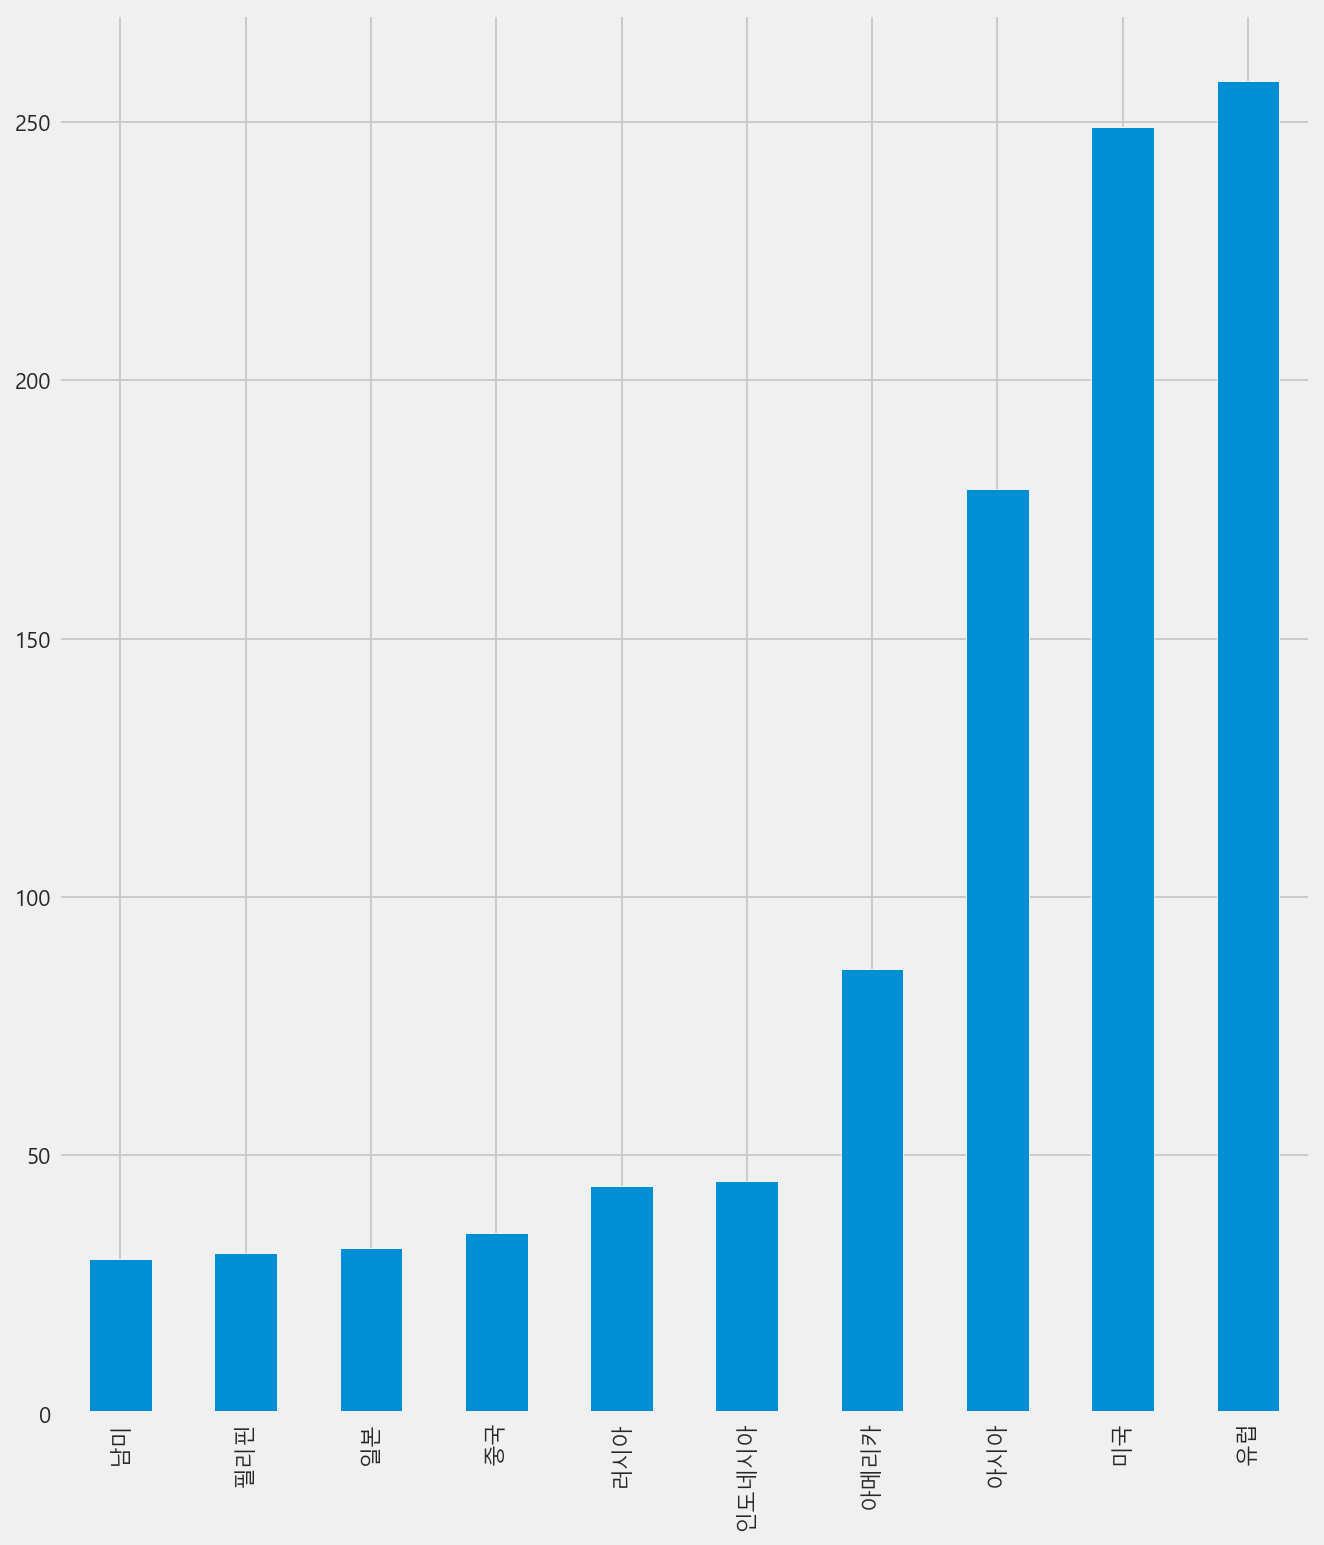

In [37]:
oversea_count_10.plot.bar(figsize=(10,12))
plt.xticks(rotation = 90)
plt.grid(True)

<AxesSubplot:>

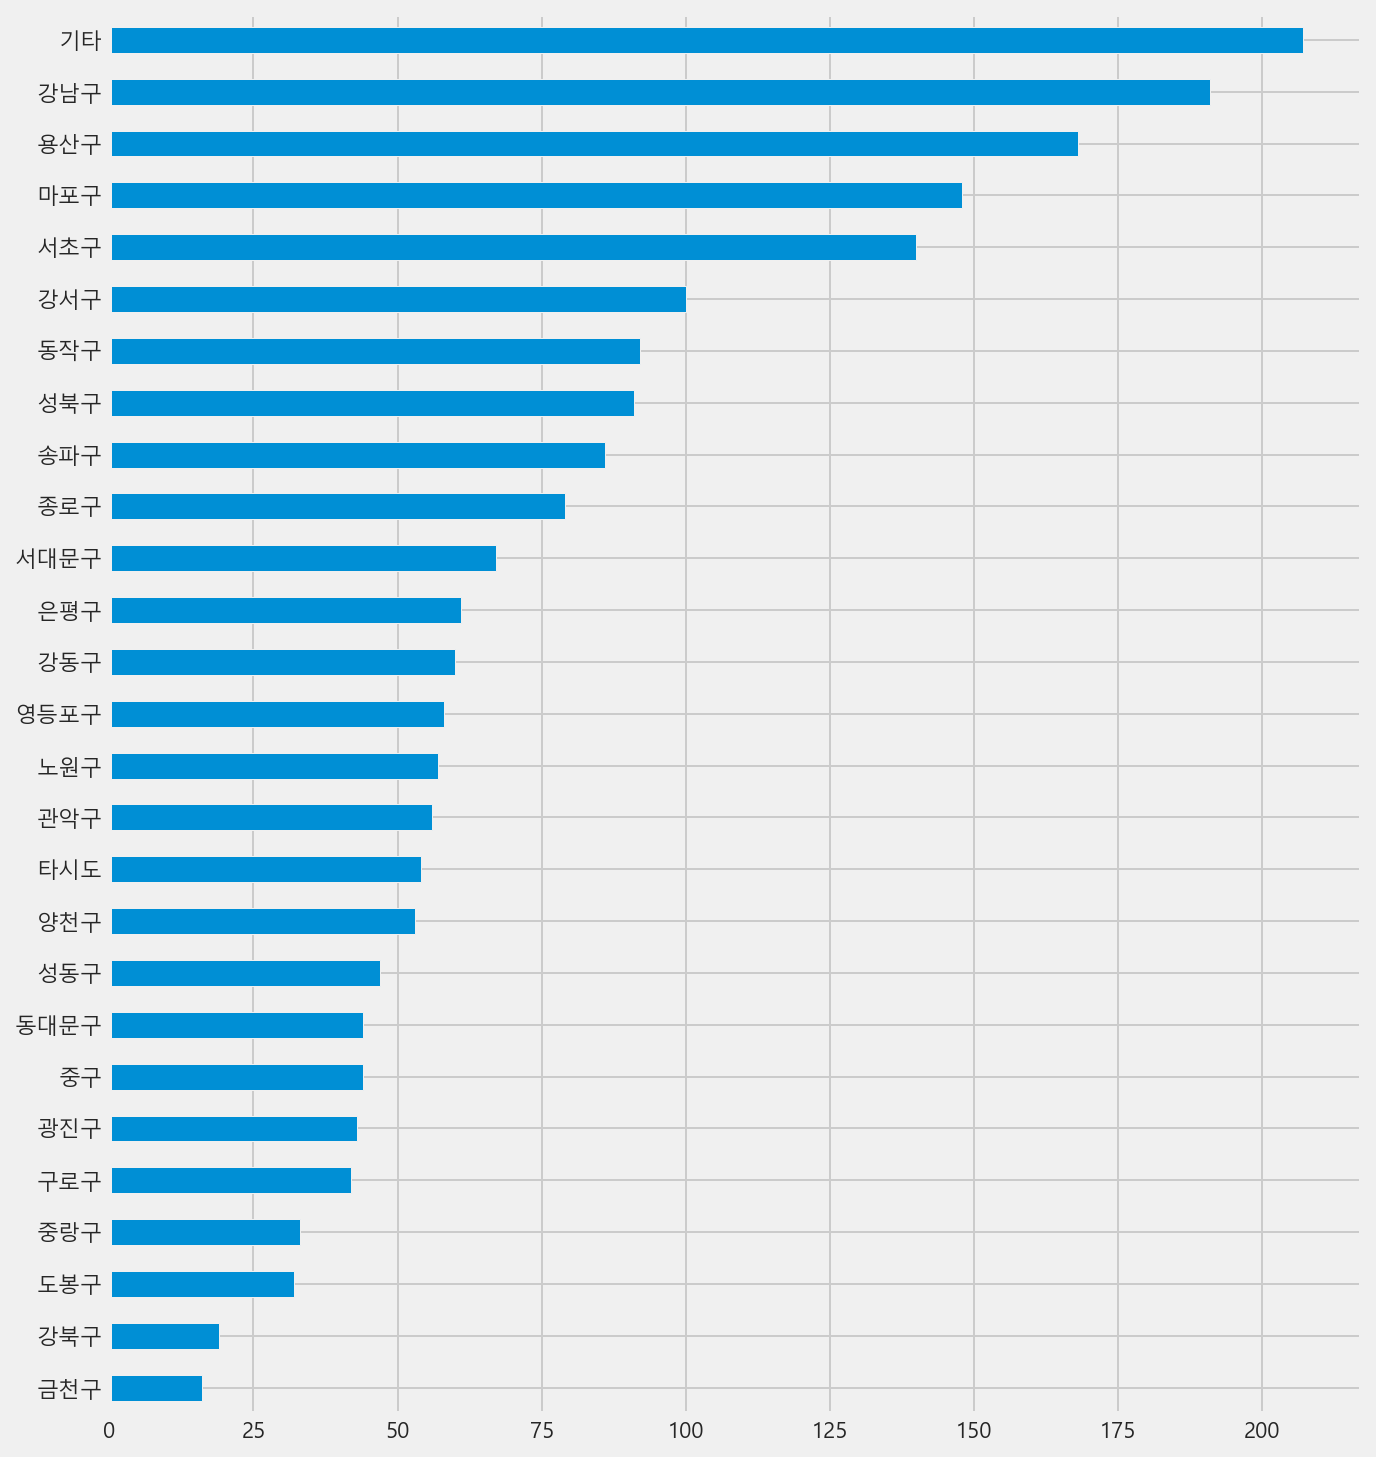

In [38]:
oversea_count_gu = df_oversea["거주지"].value_counts()
oversea_count_gu.sort_values().plot.barh(figsize=(10,12))

In [39]:
# 거주지 별 전체 확진자
all_count_gu = df["거주지"].value_counts()
df_all_gu = all_count_gu.to_frame() # 시리즈를 데이터프레임으로 변환 
df_all_gu.columns = ["전체확진수"]


# 거주지 별 여행력을 가진 확진자 
oversea_count_gu = df_oversea["거주지"].value_counts()
df_oversea_gu = oversea_count_gu.to_frame()
df_oversea_gu.columns = ["여행력존재확진수"]

In [40]:
df_all_oversea_case = df_all_gu.merge(df_oversea_gu, left_index=True, right_index=True)
df_all_oversea_case

,전체확진수,여행력존재확진수
송파구,11652,86
강남구,10873,191
관악구,9816,56
타시도,9735,54
구로구,9380,42
영등포구,9186,58
강서구,8935,100
은평구,8170,61
성북구,8034,91
노원구,7998,57


<AxesSubplot:>

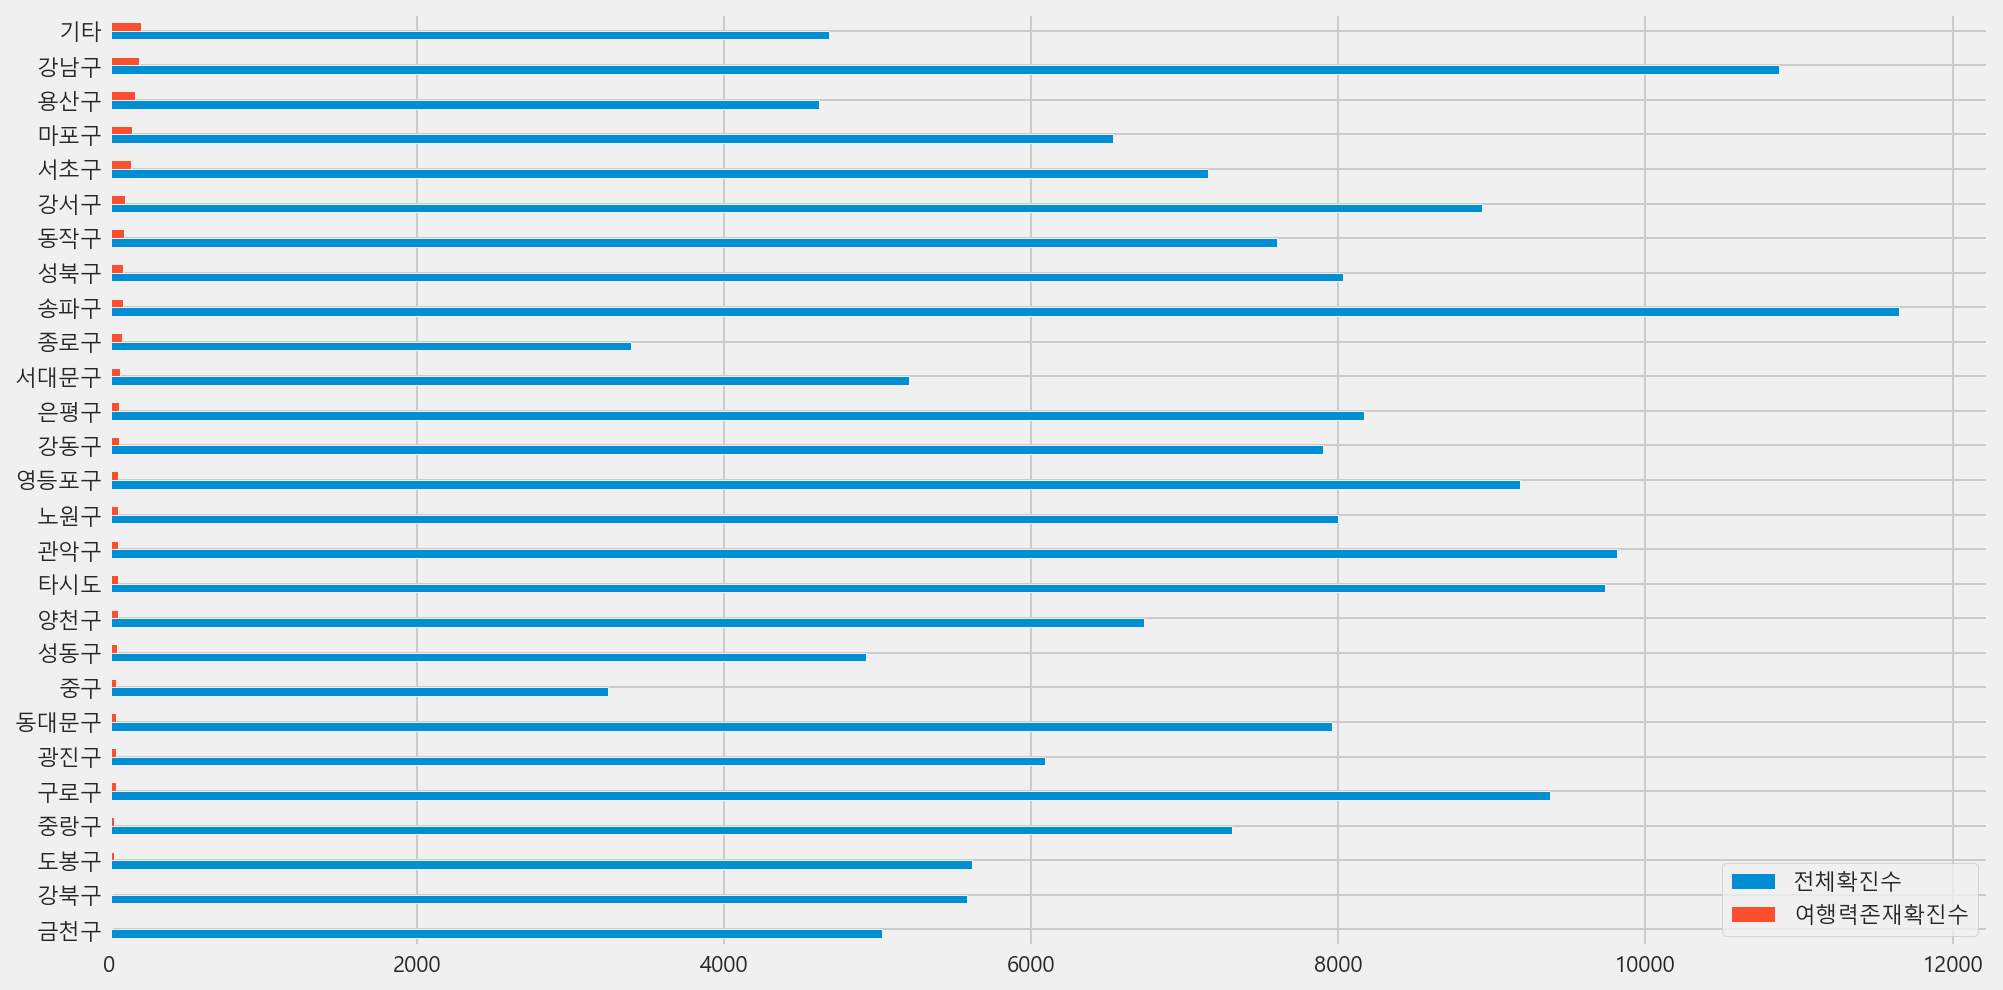

In [41]:
df_all_oversea_case.sort_values(by="여행력존재확진수").plot.barh(figsize=(15,8))

### 정책 단계 수립 3요소 
#### 코로나 일일 확진자 수 , 위중증환자 수 ,  사망자 수